## Haris Sumra
## 11/17/2019
## M12-Muscle Builder: Statistical Test

### In this Module we are going to:
* How many building violations are issued in NYC each year? What are the most common types of violations issued? Where are the most building violations issued?
* Formatting the violations so that we can see which years there were most violations issued
* We will also anaswer which zipcodes had the most tickets issued

### Importing Libraries

In [158]:
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from __future__ import division
from geopandas import GeoDataFrame

# Set max column display width to 55
pd.set_option("display.max_columns", 55)

In [129]:
df = pd.read_csv("https://data.cityofnewyork.us/resource/wvxf-dwi5.csv?$limit=50000")

In [157]:
directory = '../Module12/../' #set the directory for where the data can be found on your machine

### At this point, you want to preview the data to make sure it was read in properly.

In [137]:
df

violationid  buildingid  registrationid  boroid       boro housenumber  \
0         10000009      265980          301467       3   BROOKLYN         355   
1         10000011       73852          226626       2      BRONX        1123   
2         10000012       80102          211704       2      BRONX         751   
3         10000014      268639          350942       3   BROOKLYN          54   
4         10000017      268167          300713       3   BROOKLYN         146   
5         10000019      268443          314037       3   BROOKLYN         197   
6         10000022      265980          301467       3   BROOKLYN         355   
7         10000024       97795          220733       2      BRONX         608   
8         10000026       97799          210701       2      BRONX         619   
9         10000029      220506          325404       3   BROOKLYN        5206   
10        10000035      265980          301467       3   BROOKLYN         355   
11        10000036      220512          331531       3   BROOKLYN        5214   
12        10000040       95815          210942       2      BRONX        1138   
13        10000050       92689          204906       2      BRONX        2280   
14        10000058      367812          363511       3   BROOKLYN         213   
15        11332260       28166          114068       1  MANHATTAN          67   
16        10000070      349658          317925       3   BROOKLYN        1509   
17        10000074      116656          200683       2      BRONX        1980   
18        10000078      306728          357205       3   BROOKLYN        1351   
19        10000082      306728          357205       3   BROOKLYN        1351   
20        10000084      306728          357205       3   BROOKLYN        1351   
21        10000085      306728          357205       3   BROOKLYN        1351   
22        10000087      306728          357205       3   BROOKLYN        1351   
23        10000088      306728          357205       3   BROOKLYN        1351   
24        10000089      306728          357205       3   BROOKLYN        1351   
25        10000091       28098          111925       1  MANHATTAN         348   
26        10000071      349658          317925       3   BROOKLYN        1509   
27        10000060       65537          207907       2      BRONX        1742   
28        10000105      354272          355611       3   BROOKLYN        2488   
29        10564530      240438          300670       3   BROOKLYN        1940   
...            ...         ...             ...     ...        ...         ...   
49970     10150460       46644          200815       2      BRONX        2605   
49971     10150461       46644          200815       2      BRONX        2605   
49972     10150462       46644          200815       2      BRONX        2605   
49973     10150463       46644          200815       2      BRONX        2605   
49974     10150464       46644          200815       2      BRONX        2605   
49975     10150465       46644          200815       2      BRONX        2605   
49976     10150466       46644          200815       2      BRONX        2605   
49977     10150474      120568          204052       2      BRONX        2049   
49978     10150476      120568          204052       2      BRONX        2049   
49979     10150504      347363          300140       3   BROOKLYN        1996   
49980     10150505      120819          205695       2      BRONX        1767   
49981     10150508      842019          140128       1  MANHATTAN          95   
49982     10150509      842019          140128       1  MANHATTAN          95   
49983     10150523      347363          300140       3   BROOKLYN        1996   
49984     10150527      120819          205695       2      BRONX        1767   
49985     10150529      120819          205695       2      BRONX        1767   
49986     10150531      120819          205695       2      BRONX        1767   
49987     10150533      120819        

In [160]:
#df[df['boro'] == 'Bronx'] #return rows with 'issued' ticket status

# How many building permits are issued in NYC each year?
### Format date to perform datetime functions

In [161]:
years = df['novissueddate'] = pd.to_datetime(df['novissueddate'], format='%Y-%m-%d') #format date to perform datetime functions

## Counting values by year using datetime function

In [162]:
df['novissueddate'].dt.year.value_counts() 

2014.0    22555
2013.0    21247
2016.0     1254
2015.0     1109
2017.0     1024
2018.0      852
2008.0      583
2019.0      208
2009.0       90
2003.0       68
2007.0       59
2001.0       53
2006.0       48
2005.0       40
2011.0       25
1997.0       25
2004.0       25
1999.0       24
2002.0       23
2000.0       21
2012.0       21
1992.0       16
1996.0       12
1991.0       12
1998.0       11
1994.0       10
1990.0       10
1993.0        4
1989.0        4
2010.0        2
1995.0        2
1987.0        1
1985.0        1
1982.0        1
Name: novissueddate, dtype: int64

### Sorting the years then calculating percent change

In [163]:
df['novissueddate'].dt.year.value_counts().sort_index().pct_change() 

1982.0            NaN
1985.0       0.000000
1987.0       0.000000
1989.0       3.000000
1990.0       1.500000
1991.0       0.200000
1992.0       0.333333
1993.0      -0.750000
1994.0       1.500000
1995.0      -0.800000
1996.0       5.000000
1997.0       1.083333
1998.0      -0.560000
1999.0       1.181818
2000.0      -0.125000
2001.0       1.523810
2002.0      -0.566038
2003.0       1.956522
2004.0      -0.632353
2005.0       0.600000
2006.0       0.200000
2007.0       0.229167
2008.0       8.881356
2009.0      -0.845626
2010.0      -0.977778
2011.0      11.500000
2012.0      -0.160000
2013.0    1010.761905
2014.0       0.061562
2015.0      -0.950831
2016.0       0.130748
2017.0      -0.183413
2018.0      -0.167969
2019.0      -0.755869
Name: novissueddate, dtype: float64

# Calculate the percent change of tickets issued over years

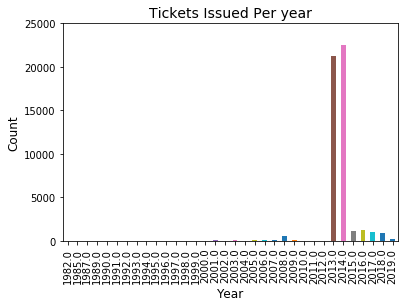

In [164]:
df['novissueddate'].dt.year.value_counts().sort_index().plot(kind='bar') #sorting index so data is in order by year

#Plotting the data
plt.title('Tickets Issued Per year', size=14)
plt.xlabel('Year', size=12)
plt.ylabel('Count', size=12)
plt.ylim(0,25000)
plt.xticks(rotation='vertical')
plt.show()

### We can observe that the tickets issued in 2014 is the highest, and in 2013 the second highest.

### Now let's compare and see if both the "boroid" and "boro" return the same numbers for furthers analysis

In [74]:
df['boroid'].value_counts().sort_values(ascending=False)

3    19264
2    16852
1     9432
4     3703
5      749
Name: boroid, dtype: int64

In [86]:
#df['boroid'] = df['boroid'].map({1: 'Manhattan', 2: 'Bronx',3: 'Brooklyn', 4: 'Queens',5: 'Staten Island'}) #use map function to set new values

In [88]:
#Plotting the data
#fig = plt.figure(figsize=(14,7))

#df['boroid'].value_counts().plot(kind='bar')

#plt.title('Tickets Issued by Borotype', size=14)
#plt.ylabel('Count', size=12)
#plt.xticks(rotation='horizontal')
#plt.show()

### Indeed, "boroid" and "boro" return the same acount of numbers.

In [167]:
df['boro'].value_counts() #counting the # of tickets by borough

BROOKLYN         19264
BRONX            16852
MANHATTAN         9432
QUEENS            3703
STATEN ISLAND      749
Name: boro, dtype: int64

### We can now compare which Borough got the highest tickets

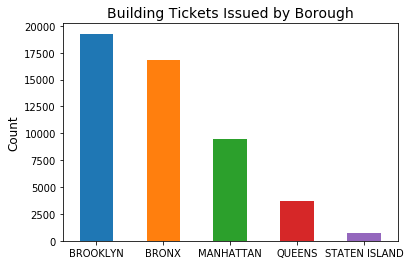

In [168]:
#Plotting the data
df['boro'].value_counts().plot(kind='bar')

plt.title('Building Tickets Issued by Borough', size=14)
plt.ylabel('Count', size=12)
plt.xticks(rotation='horizontal')
plt.show()

In [91]:
df['currentstatus'].value_counts().sort_values(ascending=False)

VIOLATION CLOSED                            41942
VIOLATION DISMISSED                          4156
FIRST NO ACCESS TO RE- INSPECT VIOLATION     1464
NOT COMPLIED WITH                            1296
NOV SENT OUT                                  510
DEFECT LETTER ISSUED                          204
NOV CERTIFIED LATE                            176
SECOND NO ACCESS TO RE-INSPECT VIOLATION      145
VIOLATION WILL BE REINSPECTED                  36
INVALID CERTIFICATION                          35
FALSE CERTIFICATION                            20
INFO NOV SENT OUT                               7
CIV14 MAILED                                    4
NOV CERTIFIED ON TIME                           2
CERTIFICATION POSTPONMENT GRANTED               1
NOTICE OF ISSUANCE SENT TO TENANT               1
VIOLATION REOPEN                                1
Name: currentstatus, dtype: int64

## Running some statistical analysis on two of my Borough to see what values they return and if they are outliers by any chance. 

In [169]:
len(df[df['boro'] == 'MANHATTAN']) / len(df) #dividing the number of Manhattan records by the entire data set

0.18864

In [93]:
len(df[df['boro'] == 'BROOKLYN']) / len(df) #dividing the number of Brooklyn records by the entire data set

0.38528

## Boroughs seems to be within the statistical means

### What are Ticket types by residential?

In [111]:
boro = ['BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND', 'BRONX'] #list of borough names to pass to for loop

for i in boro:
    """
    this for loop returns the percentage of residential permits
    within each borough

    count the number of residential permits then divide by the
    total number of borough permits
    """
    print ('\n' + i)
    print (df[df['boro'] == i]['residential'].value_counts() / len(df[df['boro'] == i]))

### Now let's check to see which Zip code had the highest ticket number and run some statistical analysis on them

### How many tickets have been issued by zip code?

In [171]:
df['zip'].value_counts().sort_index().head(5)  #counting the # of permits by zipcode then sorting them

10001.0     74
10002.0    177
10003.0    112
10005.0      1
10009.0    142
Name: zip, dtype: int64

In [121]:
df = df[df['zip'] >= 10000] #returns only zip codes that are > or = to 10000

### Zipcode with most tickets issues

In [127]:
df['zip'].value_counts().sort_values(ascending=False).head(5) #five zip codes with most tickets issued

11226.0    1882
10453.0    1798
10458.0    1631
11221.0    1494
11233.0    1484
Name: zip, dtype: int64

In [134]:
#zip_codes = GeoDataFrame.from_file('../directory/ZIP_CODE_040114.shp') #read in shape file

In [149]:
##zip_codes = GeoDataFrame.from_file(directory + '../ZIP_CODE_040114/ZIP_CODE_040114.shp') #read in shape file

In [150]:
#zip_codes['zip_code'] = zip_codes['ZIPCODE'].astype(int) #converting zipcode column to integer data type
#df['zip_code'] = df['zip_code'].astype(int)

In [151]:
#counts = df['zip_code'].value_counts()
#counts = counts.to_frame(name='count')
#counts = counts.reset_index()

In [153]:
#counts = GeoDataFrame(counts.merge(zip_codes, how='left', left_on='index', right_on='zip_code'))

In [154]:
#counts = counts.dropna() #drop null values

In [156]:
#Plotting the data
#fig, ax = plt.subplots(figsize = (8,8))

#counts.plot(column='count', cmap='Blues',alpha=1,linewidth=0.1, ax=ax)

#plt.title('Building Permits by Zipcode', size=20)
#plt.axis('off')
#plt.show()

# The heatmap is darker in areas with more tickets are issued, and lighter in areas with fewer tickets issued.

## We can observe that the tickets issued in 2014 is the highest, and in 2013 the second highest. Brooklyn had the highest number of tickets issued. And Zipcode 11226 had the highest number of tickets issued in Brooklyn.